# Create a Machine Learning Model for the Web App

This notebook will cover:

- Feature Selection (cont. from EDA)
- Machine Learning Model Selection
- Testing Model
- Saving (Pickle) the ML model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_excel("Output_Data/new_df.xlsx")
df.head()

,SA2_NAME,SA2_MAINCODE,Number of available beds,Population,Median_Annual_Income,No_of_Dwellings,No_of_people_earning_income,No_of_tertiary_educated,Ppl_on_Mortgage,Number_of_renters,No_of_indigenous_ppl,AREA_ALBERS_SQKM
0,ACT - South West,801111140,45.7,5158,66401,190,317,109,53,31,0,416.6124
1,Acton - Upper Burnie,604011075,145.0,3206,46033,1628,1184,135,438,556,5,2.1455
2,Adelaide,401011001,812.0,16285,54807,8147,5972,5237,904,3978,7,10.4824
3,Adelaide Hills,401021003,17.0,6914,60508,2670,3558,944,1132,227,0,364.4390
4,Airlie - Whitsundays,312031359,33.0,13375,50559,5701,6653,1359,1061,1788,22,304.0111


In [3]:
X_train = df.drop(['Number of available beds', 'SA2_NAME', 'SA2_MAINCODE', 'AREA_ALBERS_SQKM'], axis=1).fillna(0)
y_train = df['Number of available beds'].fillna(0)

Text(0.5, 1.0, 'Which Feature(s) are most important')

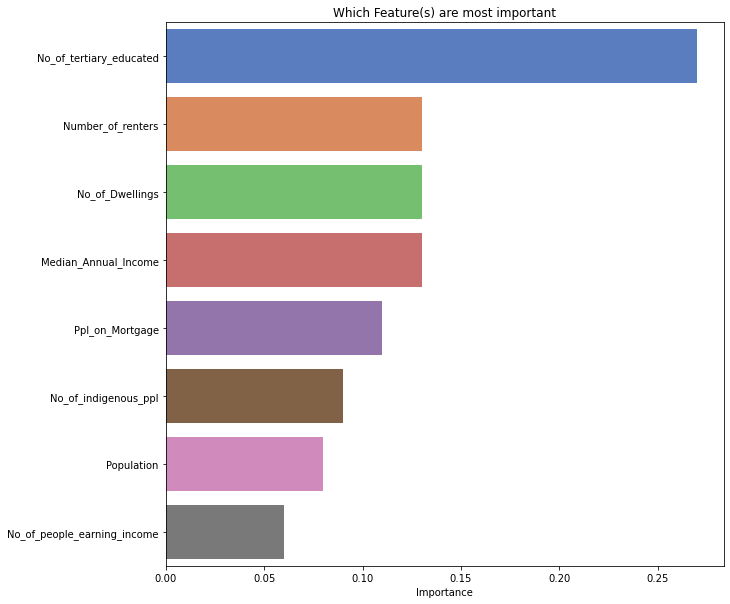

In [4]:
#Feature importance
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
rfr.fit(X_train, y_train)

f_im = rfr.feature_importances_.round(2)
rank = pd.Series(f_im, index=X_train.columns).sort_values(ascending=False)

figsize = [10.0, 10.0]

plt.figure(figsize=figsize)
sns.barplot(y=rank.index,x=rank.values,palette='muted')
plt.xlabel('Importance')
plt.title('Which Feature(s) are most important')

## Reduce the number of features and select the best features for End User Experience

In [5]:
X_train.head()

,Population,Median_Annual_Income,No_of_Dwellings,No_of_people_earning_income,No_of_tertiary_educated,Ppl_on_Mortgage,Number_of_renters,No_of_indigenous_ppl
0,5158,66401,190,317,109,53,31,0
1,3206,46033,1628,1184,135,438,556,5
2,16285,54807,8147,5972,5237,904,3978,7
3,6914,60508,2670,3558,944,1132,227,0
4,13375,50559,5701,6653,1359,1061,1788,22


In [6]:
X_train= X_train[["Population", "No_of_Dwellings", "Median_Annual_Income", "No_of_tertiary_educated"]]

In [7]:
X_train.head()

,Population,No_of_Dwellings,Median_Annual_Income,No_of_tertiary_educated
0,5158,190,66401,109
1,3206,1628,46033,135
2,16285,8147,54807,5237
3,6914,2670,60508,944
4,13375,5701,50559,1359


Text(0.5, 1.0, 'Which Feature(s) are most important')

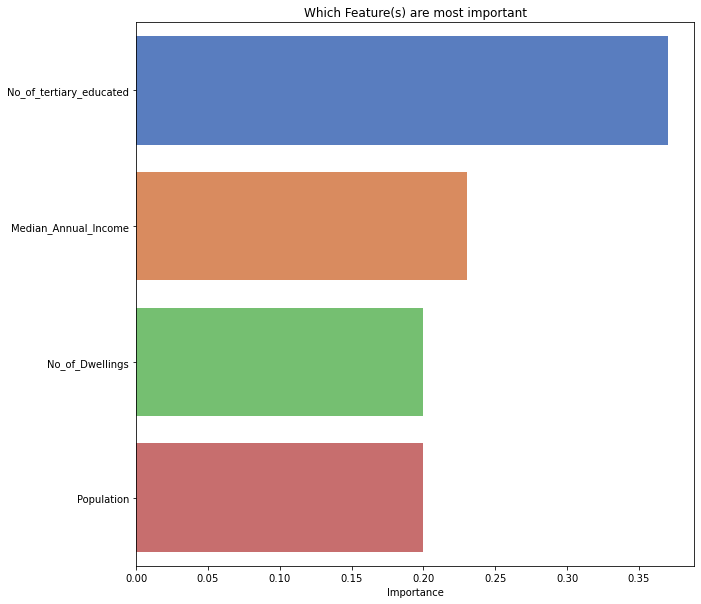

In [8]:
#Feature importance
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
rfr.fit(X_train, y_train)

f_im = rfr.feature_importances_.round(2)
rank = pd.Series(f_im, index=X_train.columns).sort_values(ascending=False)

figsize = [10.0, 10.0]

plt.figure(figsize=figsize)
sns.barplot(y=rank.index,x=rank.values,palette='muted')
plt.xlabel('Importance')
plt.title('Which Feature(s) are most important')

## Determine which Regression model performs the best 

In [9]:
# Import machine learning modules

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 

# Function that runs the requested algorithm and returns the accuracy metrics

# Reference: https://github.com/mrdbourke/your-first-kaggle-submission/blob/master/kaggle-titanic-dataset-example-submission-workflow.ipynb

def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    score = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    
    return train_pred, score



# Random Forest Regressor ----------------------------------------------------------------

train_pred_log, acc_rfor = fit_ml_algo(RandomForestRegressor(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)

# Linear Regression ---------------------------------------------------------------------

train_pred_log, acc_lin = fit_ml_algo(LinearRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)


# Decision Tree Regressor --------------------------------------------------------------------

train_pred_knn, acc_dtr = fit_ml_algo(DecisionTreeRegressor(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)


# Support Vector Regressor --------------------------------------------------------------------

train_pred_svr, acc_svr = fit_ml_algo(SVR(),
                                           X_train,
                                           y_train,
                                           10)




In [10]:

# Accuracy Scores --------------------------------------------------------------------------

models = pd.DataFrame({
    'Model': ['RandomForestRegressor', 'LinearRegression', 'DecisionTreeRegressor', 'SVR'],
    'Score': [
        acc_rfor,
        acc_lin, 
        acc_dtr, 
        acc_svr
    ]})
print("---Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Accuracy Scores---


,Model,Score
2,DecisionTreeRegressor,100.00
0,RandomForestRegressor,87.69
1,LinearRegression,13.94
3,SVR,-18.11


## Hyperparameter Training

### Determine what the max_depth should be for the Random Forest Regressor

In [11]:
regressor = RandomForestRegressor(max_depth=17)
regressor.fit(X_train,y_train)
print(round(regressor.score(X_train, y_train) * 100, 2))

87.86


# Test the model to compare with App

In [12]:
X_train.columns

Index(['Population', 'No_of_Dwellings', 'Median_Annual_Income',
       'No_of_tertiary_educated'],
      dtype='object')

In [13]:
X_train.describe()

,Population,No_of_Dwellings,Median_Annual_Income,No_of_tertiary_educated
count,901.000000,901.000000,901.000000,901.000000
mean,10147.988901,4425.204218,55533.567148,1393.096559
std,6343.516110,2642.198249,11445.221428,1586.195346
min,52.000000,3.000000,29045.000000,4.000000
25%,5281.000000,2437.000000,47977.000000,434.000000
50%,8237.000000,3749.000000,53634.000000,851.000000
75%,13973.000000,5936.000000,60753.000000,1750.000000
max,33811.000000,20156.000000,119477.000000,11753.000000


In [14]:
Population = 8237
No_of_Dwellings = 3749
Median_Annual_Income = 53634
No_of_tertiary_educated = 851


print(regressor.predict([[Population,
                          No_of_Dwellings,
                          Median_Annual_Income,
                          No_of_tertiary_educated]]))

[284.93408333]


## Save the ML model to be used in Web App

In [15]:
import pickle

filename = 'Model\hospital_bed_pred.pkl'
pickle.dump(regressor, open(filename, 'wb'))